# 이미지 확대

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 1. 400 * 400 px

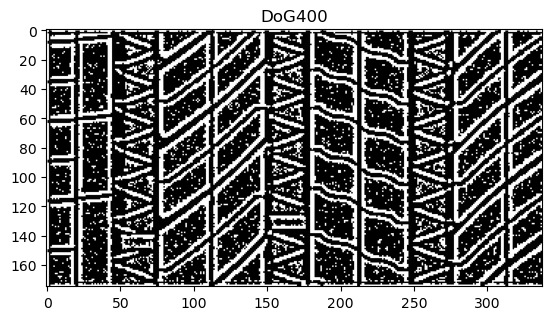

In [227]:
#DoG
img = cv2.imread('./ask.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian1 = cv2.GaussianBlur(gray, (5, 5), 1.8)
gaussian2 = cv2.GaussianBlur(gray, (5, 5), 1.2)
height, width = gray.shape
DoG400 = np.zeros_like(gray)

for i in range(height):
    for j in range(width):
        DoG400[i][j] = float(gaussian1[i][j]) - float(gaussian2[i][j])

plt.imshow(DoG400, cmap='gray')
plt.title('DoG400')
plt.show()

In [301]:
def photo(img):
    prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    prewitt_x = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_x))
    prewitt_y = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_y))

    prewitt = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)
    prewitt = 255-prewitt

    prewitt = cv2.cvtColor(prewitt, cv2.COLOR_BGR2GRAY)
    
    th2 = cv2.adaptiveThreshold(prewitt, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 2, 2)
    
    return th2

img = cv2.imread('./ask.png')
prewitt400 = photo(img)

plt.imshow(prewitt400, cmap='gray')
plt.title('prewitt400')
plt.show()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


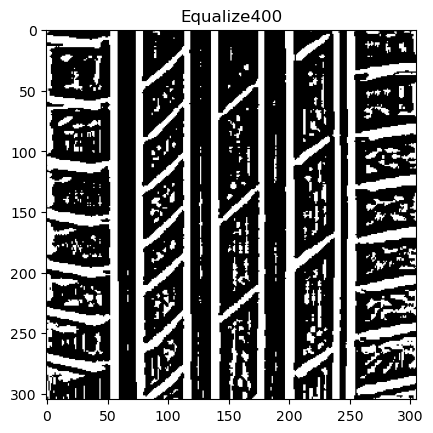

In [43]:
# 이미지 로드
img = cv2.imread('./2.png', cv2.IMREAD_GRAYSCALE)

# 히스토그램 균일화
img_equalized = cv2.equalizeHist(img)

# 영역 이진화
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

plt.imshow(th2, cmap='gray')
plt.title('Equalize400')
plt.show()

# 2. 300 * 300 px

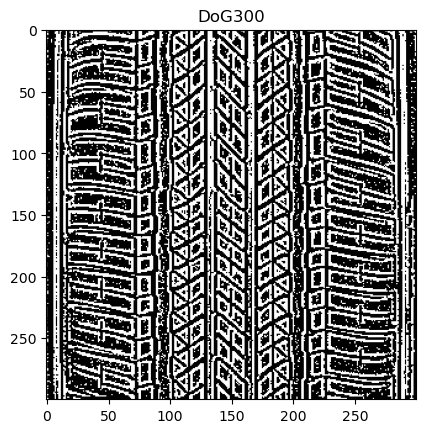

In [27]:
# Binary

img = cv2.imread('./300.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian1 = cv2.GaussianBlur(gray, (5, 5), 1.6)
gaussian2 = cv2.GaussianBlur(gray, (5, 5), 1)
height, width = gray.shape
DoG300 = np.zeros_like(gray)

for i in range(height):
    for j in range(width):
        DoG300[i][j] = float(gaussian1[i][j]) - float(gaussian2[i][j])

plt.imshow(DoG300, cmap='gray')
plt.title('DoG300')
plt.show()

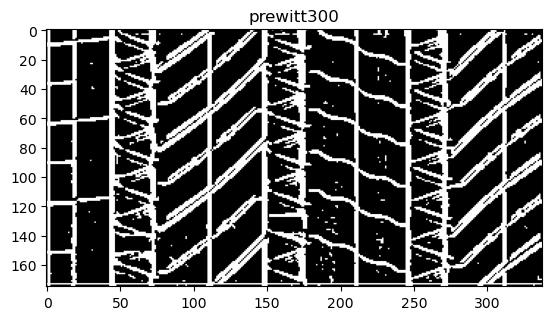

In [635]:
def photo(img):
    prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    prewitt_x = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_x))
    prewitt_y = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_y))

    prewitt = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)
    prewitt = 255-prewitt

    prewitt = cv2.cvtColor(prewitt, cv2.COLOR_BGR2GRAY)
    
    th2 = cv2.adaptiveThreshold(prewitt, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25,2)
    
    return th2

img = cv2.imread('./ask.png')
prewitt300 = photo(img)

plt.imshow(prewitt300, cmap='gray')
plt.title('prewitt300')
plt.show()

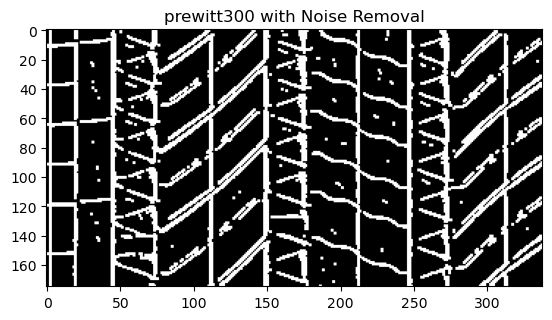

In [394]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def photo(img):
    prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    prewitt_x = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_x))
    prewitt_y = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_y))

    prewitt = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)
    prewitt = 255 - prewitt

    prewitt = cv2.cvtColor(prewitt, cv2.COLOR_BGR2GRAY)
    
    th2 = cv2.adaptiveThreshold(prewitt, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 5)
    
    return th2

def remove_noise(img):
    # Apply morphological opening to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return opened

img = cv2.imread('./ask.png')
prewitt300 = photo(img)
prewitt300_noise_removed = remove_noise(prewitt300)

plt.imshow(prewitt300_noise_removed, cmap='gray')
plt.title('prewitt300 with Noise Removal')
plt.show()


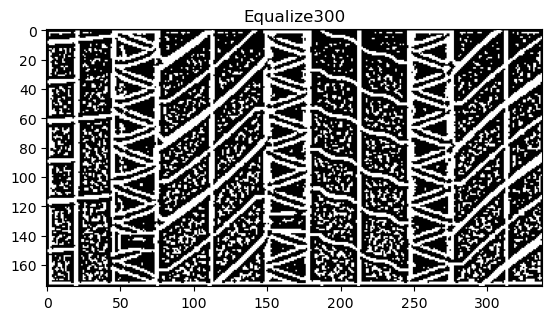

In [400]:
# 이미지 로드
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# 히스토그램 균일화
img_equalized = cv2.equalizeHist(img)

# 영역 이진화
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,5, 4)

plt.imshow(th2, cmap='gray')
plt.title('Equalize300')
plt.show()

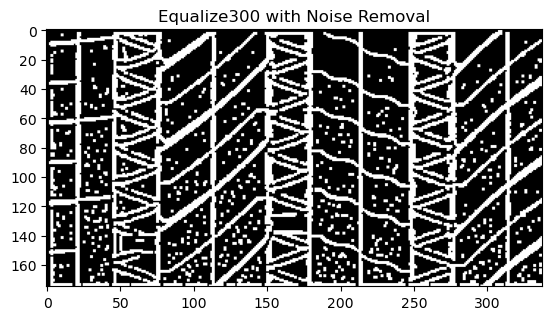

In [404]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# Histogram equalization
img_equalized = cv2.equalizeHist(img)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 4)

# Apply morphological opening to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
opened = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)

plt.imshow(opened, cmap='gray')
plt.title('Equalize300 with Noise Removal')
plt.show()


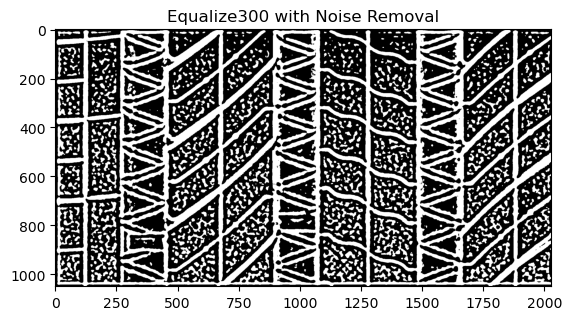

In [481]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to a larger size
resized_img = cv2.resize(img, None, fx=6, fy=6, interpolation=cv2.INTER_CUBIC)

# Histogram equalization
img_equalized = cv2.equalizeHist(resized_img)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 3)

# Apply morphological opening to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)

plt.imshow(opened, cmap='gray')
plt.title('Equalize300 with Noise Removal')
plt.show()


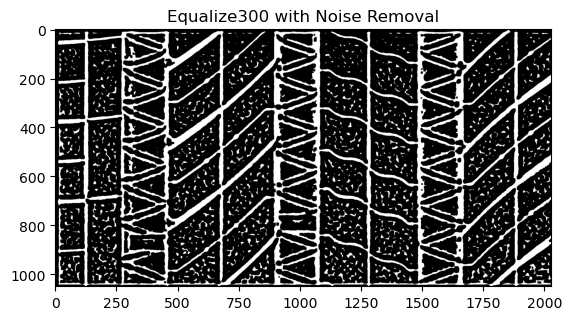

In [660]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to a larger size
resized_img = cv2.resize(img, None, fx=6, fy=6, interpolation=cv2.INTER_CUBIC)

# Histogram equalization
img_equalized = cv2.equalizeHist(resized_img)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 2)

# Apply morphological opening to remove noise
kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
opened = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel_open)

# Apply morphological erosion to further remove noise
kernel_erode = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
eroded = cv2.erode(opened, kernel_erode, iterations=1)

# Apply morphological closing to fill small white areas
closed = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel_open)

plt.imshow(closed, cmap='gray')
plt.title('Equalize300 with Noise Removal')
plt.show()


## 지금 까지 베스트 

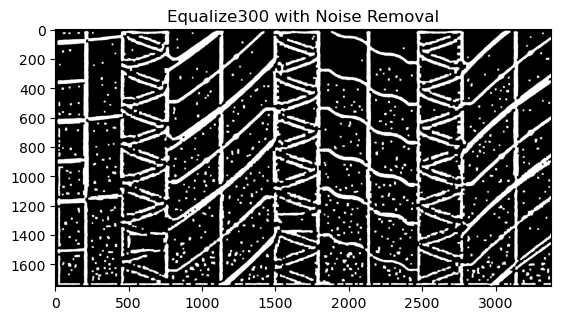

In [736]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to a larger size
resized_img = cv2.resize(img, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)

# Histogram equalization
img_equalized = cv2.equalizeHist(resized_img)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25,2)

# Apply morphological opening to remove noise
kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Larger kernel size
opened = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel_open)

# Apply morphological erosion to further remove noise
kernel_erode = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(opened, kernel_erode, iterations=6)

# Apply morphological dilation to enhance the result
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
dilated = cv2.dilate(eroded, kernel_dilate, iterations=2)

# Apply morphological closing to fill small white areas
closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel_open)

plt.imshow(closed, cmap='gray')
plt.title('Equalize300 with Noise Removal')
plt.show()


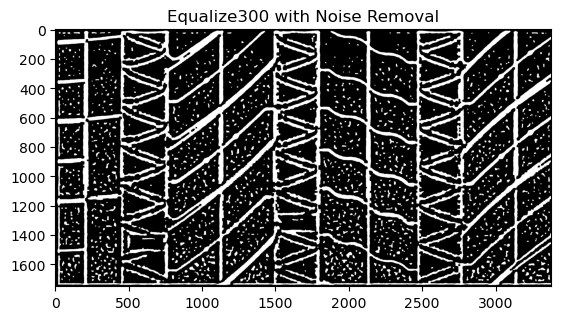

In [749]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to a larger size
resized_img = cv2.resize(img, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)

# Histogram equalization
img_equalized = cv2.equalizeHist(resized_img)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25,2)

# Apply morphological opening to remove noise
kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Larger kernel size
opened = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel_open)

# Apply morphological erosion to further remove noise
kernel_erode = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(opened, kernel_erode, iterations=6)

# Apply morphological dilation to enhance the result
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
dilated = cv2.dilate(eroded, kernel_dilate, iterations=2)

# Apply morphological erosion to further remove noise
kernel_erode2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded2 = cv2.erode(opened, kernel_erode2, iterations=2)


# Apply morphological closing to fill small white areas
closed = cv2.morphologyEx(eroded2, cv2.MORPH_CLOSE, kernel_open)

plt.imshow(closed, cmap='gray')
plt.title('Equalize300 with Noise Removal')
plt.show()


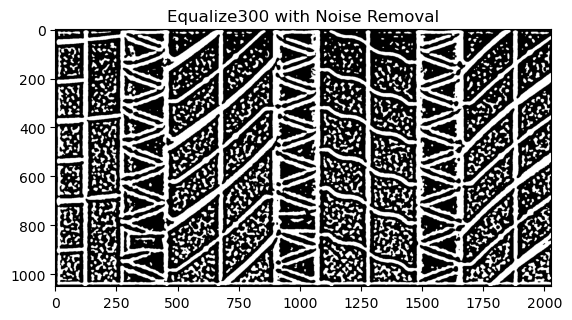

In [483]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to a larger size
resized_img = cv2.resize(img, None, fx=6, fy=6, interpolation=cv2.INTER_CUBIC)

# Histogram equalization
img_equalized = cv2.equalizeHist(resized_img)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 3)

# Apply morphological opening to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)

# Apply morphological closing to fill small white areas
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap='gray')
plt.title('Equalize300 with Noise Removal')
plt.show()


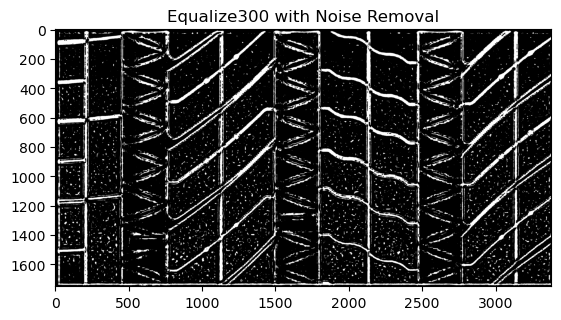

In [616]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to a larger size
resized_img = cv2.resize(img, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)

# Histogram equalization
img_equalized = cv2.equalizeHist(resized_img)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

# Apply morphological opening to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
opened = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)

# Apply morphological erosion to further remove noise
eroded = cv2.erode(opened, kernel, iterations= 3)

# Apply morphological closing to fill small white areas
closed = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap='gray')
plt.title('Equalize300 with Noise Removal')
plt.show()


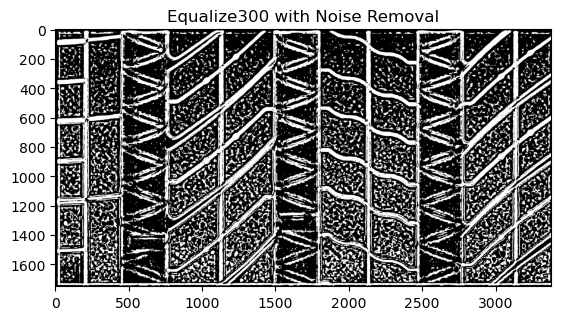

In [615]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./ask.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to a larger size
resized_img = cv2.resize(img, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)

# Histogram equalization
img_equalized = cv2.equalizeHist(resized_img)

# Adaptive thresholding
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

# Apply morphological opening to remove noise
kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
opened = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel_open)

# Apply morphological dilation to fill small white areas
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(opened, kernel_dilate, iterations=1)

# Apply morphological erosion to further remove noise
kernel_erode = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
eroded = cv2.erode(dilated, kernel_erode, iterations=1)

# Apply morphological closing to further enhance the result
closed = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel_erode)

plt.imshow(closed, cmap='gray')
plt.title('Equalize300 with Noise Removal')
plt.show()


# 3. 200 * 200 px

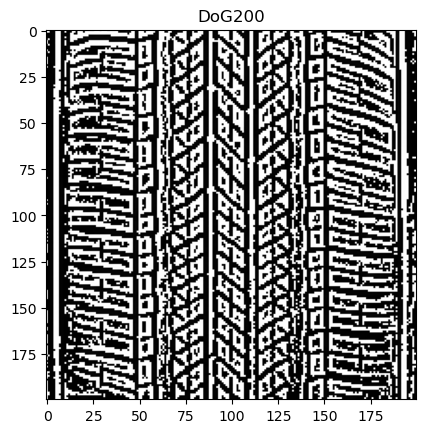

In [28]:
# Binary

img = cv2.imread('./200.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian1 = cv2.GaussianBlur(gray, (5, 5), 1.6)
gaussian2 = cv2.GaussianBlur(gray, (5, 5), 1)
height, width = gray.shape
DoG200 = np.zeros_like(gray)

for i in range(height):
    for j in range(width):
        DoG200[i][j] = float(gaussian1[i][j]) - float(gaussian2[i][j])

plt.imshow(DoG200, cmap='gray')
plt.title('DoG200')
plt.show()

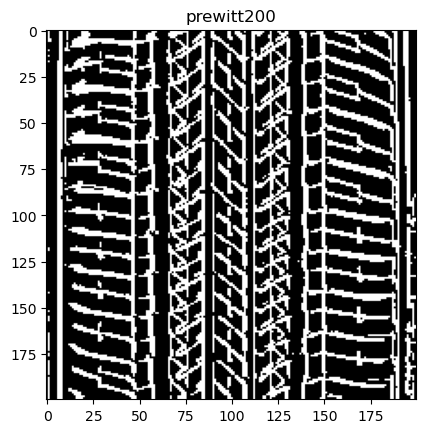

In [37]:
def photo(img):
    prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    prewitt_x = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_x))
    prewitt_y = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_y))

    prewitt = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)
    prewitt = 255-prewitt

    prewitt = cv2.cvtColor(prewitt, cv2.COLOR_BGR2GRAY)
    
    th2 = cv2.adaptiveThreshold(prewitt, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)
    
    return th2

img = cv2.imread('./200.jpg')
prewitt200 = photo(img)

plt.imshow(prewitt200, cmap='gray')
plt.title('prewitt200')
plt.show()

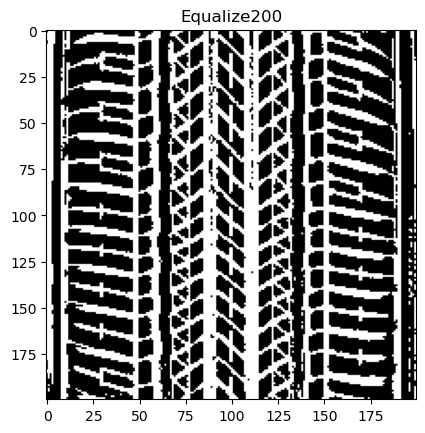

In [38]:
# 이미지 로드
img = cv2.imread('./200.jpg', cv2.IMREAD_GRAYSCALE)

# 히스토그램 균일화
img_equalized = cv2.equalizeHist(img)

# 영역 이진화
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

plt.imshow(th2, cmap='gray')
plt.title('Equalize200')
plt.show()

# 4. 150 * 150 px

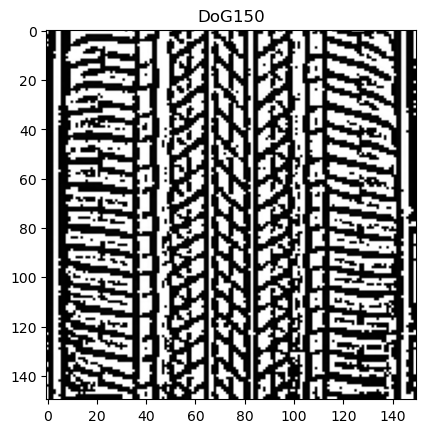

In [29]:
# Binary

img = cv2.imread('./150.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian1 = cv2.GaussianBlur(gray, (5, 5), 1.6)
gaussian2 = cv2.GaussianBlur(gray, (5, 5), 1)
height, width = gray.shape
DoG150 = np.zeros_like(gray)

for i in range(height):
    for j in range(width):
        DoG150[i][j] = float(gaussian1[i][j]) - float(gaussian2[i][j])

plt.imshow(DoG150, cmap='gray')
plt.title('DoG150')
plt.show()

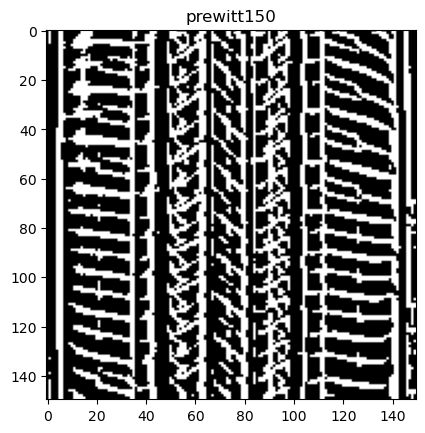

In [39]:
def photo(img):
    prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    prewitt_x = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_x))
    prewitt_y = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_y))

    prewitt = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)
    prewitt = 255-prewitt

    prewitt = cv2.cvtColor(prewitt, cv2.COLOR_BGR2GRAY)
    
    th2 = cv2.adaptiveThreshold(prewitt, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)
    
    return th2

img = cv2.imread('./150.jpg')
prewitt150 = photo(img)

plt.imshow(prewitt150, cmap='gray')
plt.title('prewitt150')
plt.show()

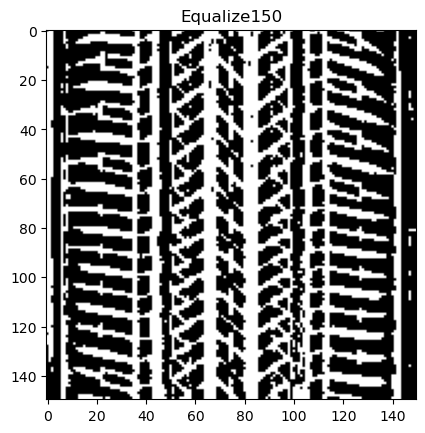

In [40]:
# 이미지 로드
img = cv2.imread('./150.jpg', cv2.IMREAD_GRAYSCALE)

# 히스토그램 균일화
img_equalized = cv2.equalizeHist(img)

# 영역 이진화
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

plt.imshow(th2, cmap='gray')
plt.title('Equalize150')
plt.show()

# 5. 100 * 100 px

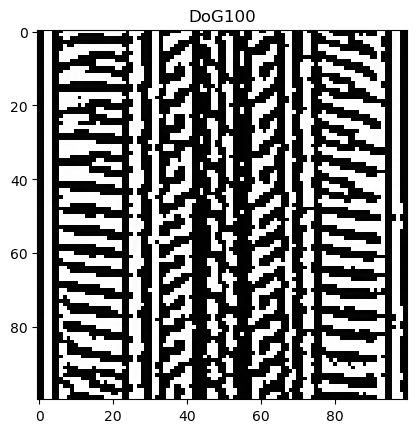

In [30]:
# Binary

img = cv2.imread('./100.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian1 = cv2.GaussianBlur(gray, (5, 5), 1.6)
gaussian2 = cv2.GaussianBlur(gray, (5, 5), 1)
height, width = gray.shape
DoG100 = np.zeros_like(gray)

for i in range(height):
    for j in range(width):
        DoG100[i][j] = float(gaussian1[i][j]) - float(gaussian2[i][j])

plt.imshow(DoG100, cmap='gray')
plt.title('DoG100')
plt.show()

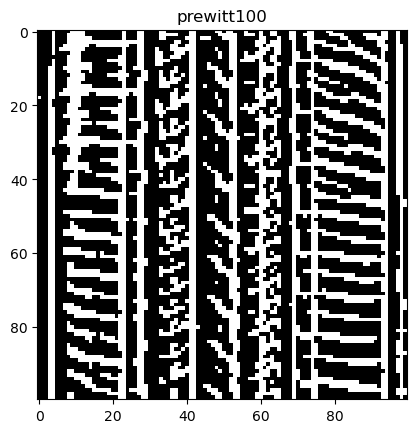

In [41]:
def photo(img):
    prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    prewitt_x = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_x))
    prewitt_y = cv2.convertScaleAbs(cv2.filter2D(img, -1, prewitt_y))

    prewitt = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)
    prewitt = 255-prewitt

    prewitt = cv2.cvtColor(prewitt, cv2.COLOR_BGR2GRAY)
    
    th2 = cv2.adaptiveThreshold(prewitt, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)
    
    return th2

img = cv2.imread('./100.jpg')
prewitt100 = photo(img)

plt.imshow(prewitt100, cmap='gray')
plt.title('prewitt100')
plt.show()

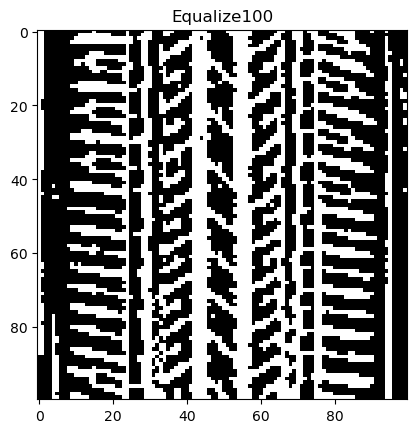

In [42]:
# 이미지 로드
img = cv2.imread('./100.jpg', cv2.IMREAD_GRAYSCALE)

# 히스토그램 균일화
img_equalized = cv2.equalizeHist(img)

# 영역 이진화
th2 = cv2.adaptiveThreshold(img_equalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)

plt.imshow(th2, cmap='gray')
plt.title('Equalize100')
plt.show()

## 이미지 픽셀별 binary 비교

- 이미지가 너무 작아서 확대하는 경우 이미지 자체가 모두 깨짐 
- 여러 보간법을 시도했지만 깨지는 것은 모두 동일함